In [1]:
# Part 1 - Import basic package and dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [7]:
df['label'].value_counts()/len(df)*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [8]:
# Data is imbalance, we have to balance it prior building a model

ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [9]:
print(ham.shape)
print(spam.shape)

(4825, 4)
(747, 4)


In [11]:
spam = spam.sample(ham.shape[0], replace=True)

In [12]:
print(ham.shape)
print(spam.shape)

(4825, 4)
(4825, 4)


In [13]:
data = ham.append(spam, ignore_index = True)
data.shape

(9650, 4)

In [14]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
4,ham,Even my brother is not like to speak with me. ...,77,2


In [15]:
data.tail()

,label,message,length,punct
9645,spam,Win the newest Harry Potter and the Order of ...,138,5
9646,spam,You won't believe it but it's true. It's Incre...,149,7
9647,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",153,11
9648,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...,134,3
9649,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...,158,3


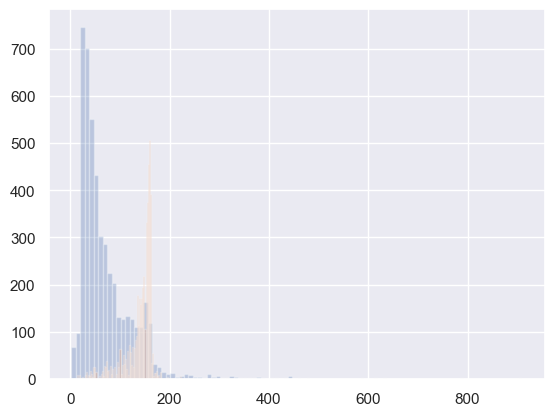

In [17]:
# Visualization by using ham and spam dataset
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.3)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.3)
plt.show()

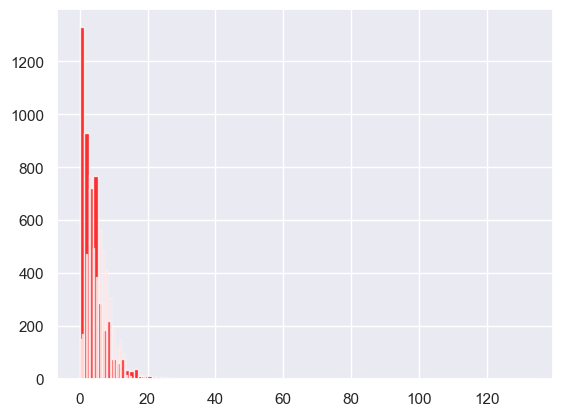

In [23]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.8, color='red')
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.8,color='red')
plt.show()

In [25]:
data.head(1)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9


In [34]:
# Bag Of Words - data['message'] : Text to Vector
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features=100)
cv = CountVectorizer()
x = cv.fit_transform(data['message']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
# split the data into training and test for building a model and prediction
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, data['label'], test_size=0.25,
                                                    random_state=101, stratify=data['label'])

In [37]:
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [38]:
len(data['message'])

9650

In [ ]:
# We have to convert 'message' into BOW format (Text to Vector)
# ML works with number only
"""
import re # regular expression
import nltk # natural language tool kit
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
"""

In [39]:
pd.DataFrame(x).shape

(9650, 8713)

In [40]:
# Building Naive Bayes Theorem
# Gaussian NB
# Bernoulli NB

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [41]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [42]:
y_pred_gnb_train = gnb.predict(x_train)
y_pred_gnb_test = gnb.predict(x_test)

In [45]:
y_pred_gnb_test

array(['ham', 'ham', 'spam', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [43]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [46]:
print(confusion_matrix(y_train, y_pred_gnb_train))
print()
print(confusion_matrix(y_test, y_pred_gnb_test))

[[3372  247]
 [   0 3618]]

[[1075  131]
 [   0 1207]]


In [47]:
print(classification_report(y_train, y_pred_gnb_train))
print()
print(classification_report(y_test, y_pred_gnb_test))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.96      3619
        spam       0.94      1.00      0.97      3618

    accuracy                           0.97      7237
   macro avg       0.97      0.97      0.97      7237
weighted avg       0.97      0.97      0.97      7237


              precision    recall  f1-score   support

         ham       1.00      0.89      0.94      1206
        spam       0.90      1.00      0.95      1207

    accuracy                           0.95      2413
   macro avg       0.95      0.95      0.95      2413
weighted avg       0.95      0.95      0.95      2413



In [48]:
print(accuracy_score(y_train, y_pred_gnb_train))
print()
print(accuracy_score(y_test, y_pred_gnb_test))

0.9658698355672239

0.9457107335267302


# BernoulliNB

In [49]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [50]:
y_pred_bnb_train = bnb.predict(x_train)
y_pred_bnb_test = bnb.predict(x_test)

In [51]:
print(confusion_matrix(y_train, y_pred_bnb_train))
print()
print(confusion_matrix(y_test, y_pred_bnb_test))

[[3617    2]
 [ 123 3495]]

[[1204    2]
 [  44 1163]]


In [52]:
print(classification_report(y_train, y_pred_bnb_train))
print()
print(classification_report(y_test, y_pred_bnb_test))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3619
        spam       1.00      0.97      0.98      3618

    accuracy                           0.98      7237
   macro avg       0.98      0.98      0.98      7237
weighted avg       0.98      0.98      0.98      7237


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.96      0.98      1207

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



In [53]:
print(accuracy_score(y_train, y_pred_bnb_train))
print()
print(accuracy_score(y_test, y_pred_bnb_test))

0.9827276495785546

0.9809365934521342
